In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import patches

In [2]:
train = pd.read_csv('./train.csv')

In [3]:
train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


In [4]:
train.shape

(17480, 16)

In [13]:
missing = []

for i in train.columns:
    if 0 != sum(train[i].isna()):
        print(i, sum(train[i].isna()))
        missing.append(i)

workclass 1836
occupation 1843
native.country 583


In [27]:
new_df = train[train.isna().sum(axis=1) > 0]

In [25]:
train[train['education'] == 'HS-grad']['workclass'].value_counts()

Private             3925
Self-emp-not-inc     435
Local-gov            251
Self-emp-inc         143
State-gov            141
Federal-gov          134
Without-pay            4
Never-worked           1
Name: workclass, dtype: int64

In [29]:
for i in train['education'].unique():
    test = train[train['education'] == i]['workclass'].value_counts()
    print(test)

Private             382
Local-gov            49
Self-emp-not-inc     41
Federal-gov          30
Self-emp-inc         20
State-gov            18
Without-pay           1
Name: workclass, dtype: int64
Private             2566
Self-emp-not-inc     235
Local-gov            182
State-gov            155
Federal-gov          127
Self-emp-inc         124
Never-worked           2
Name: workclass, dtype: int64
Private             1813
Local-gov            257
Self-emp-not-inc     192
Self-emp-inc         151
State-gov            139
Federal-gov          117
Name: workclass, dtype: int64
Private             3925
Self-emp-not-inc     435
Local-gov            251
Self-emp-inc         143
State-gov            141
Federal-gov          134
Without-pay            4
Never-worked           1
Name: workclass, dtype: int64
Private             131
Self-emp-not-inc     69
Self-emp-inc         41
State-gov            15
Local-gov            15
Federal-gov          12
Name: workclass, dtype: int64
Private      

In [32]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

# 결측치를 처리하는 함수를 작성합니다.
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 범주형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
    return temp

train = handle_na(train, missing_col)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
missing_col = check_missing_col(train)  

결측치가 있는 컬럼은: workclass 입니다
해당 컬럼에 총 1836 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: occupation 입니다
해당 컬럼에 총 1843 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: native.country 입니다
해당 컬럼에 총 583 개의 결측치가 존재합니다.
결측치가 존재하지 않습니다


In [34]:
missing_col = check_missing_col(new_df)

결측치가 있는 컬럼은: workclass 입니다
해당 컬럼에 총 1836 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: occupation 입니다
해당 컬럼에 총 1843 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: native.country 입니다
해당 컬럼에 총 583 개의 결측치가 존재합니다.


In [50]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            #dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

train = label_encoder(train, make_label_map(train))

<AxesSubplot:>

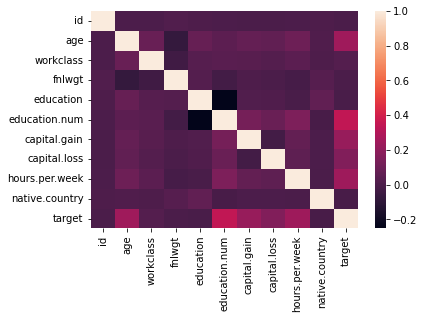

In [98]:
new = train.drop(['marital.status', 'relationship', 'sex', 'occupation', 'race'], axis=1)
sns.heatmap(new.corr())

In [63]:
X = new.drop(['id', 'target'], axis=1)
y = new['target']

In [133]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 선언
classifier = KNeighborsClassifier(n_neighbors = 3)

# 모델 학습
classifier.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [134]:
print(classifier.score(X, y))

0.8575028181155095


In [135]:
test = pd.read_csv('./test.csv')

In [136]:
ntest = test.drop(['id', 'marital.status', 'relationship', 'sex', 'occupation', 'race'], axis=1)
ntest = label_encoder(ntest, make_label_map(ntest))

In [137]:
pred = classifier.predict(ntest)

In [138]:
submission = pd.read_csv('sample_submission.csv')

In [139]:
submission['target'] = pred


In [140]:
submission

,id,target
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
15076,15076,1
15077,15077,0
15078,15078,0
15079,15079,0
